In [2]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [4]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# **EDA**

In [5]:
data = data.rename({'ID#':'ID', 'Award?':'Award'}, axis = 1)

In [6]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
data.info() #3999 rows, 12 columns and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
data1 = data.drop(['ID'], axis=1)

In [9]:
data1.tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0
3998,3016,0,1,1,1,0,0,0,0,1398,0


In [10]:
data1[data1.duplicated()] #1 duplicate row

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [11]:
data1[data1.duplicated()].shape #1 row is duplicate

(1, 11)

In [12]:
data2 = data1.drop_duplicates() #dropping duplicate row

In [13]:
data2.shape

(3998, 11)

In [14]:
data2.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [15]:
data2.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


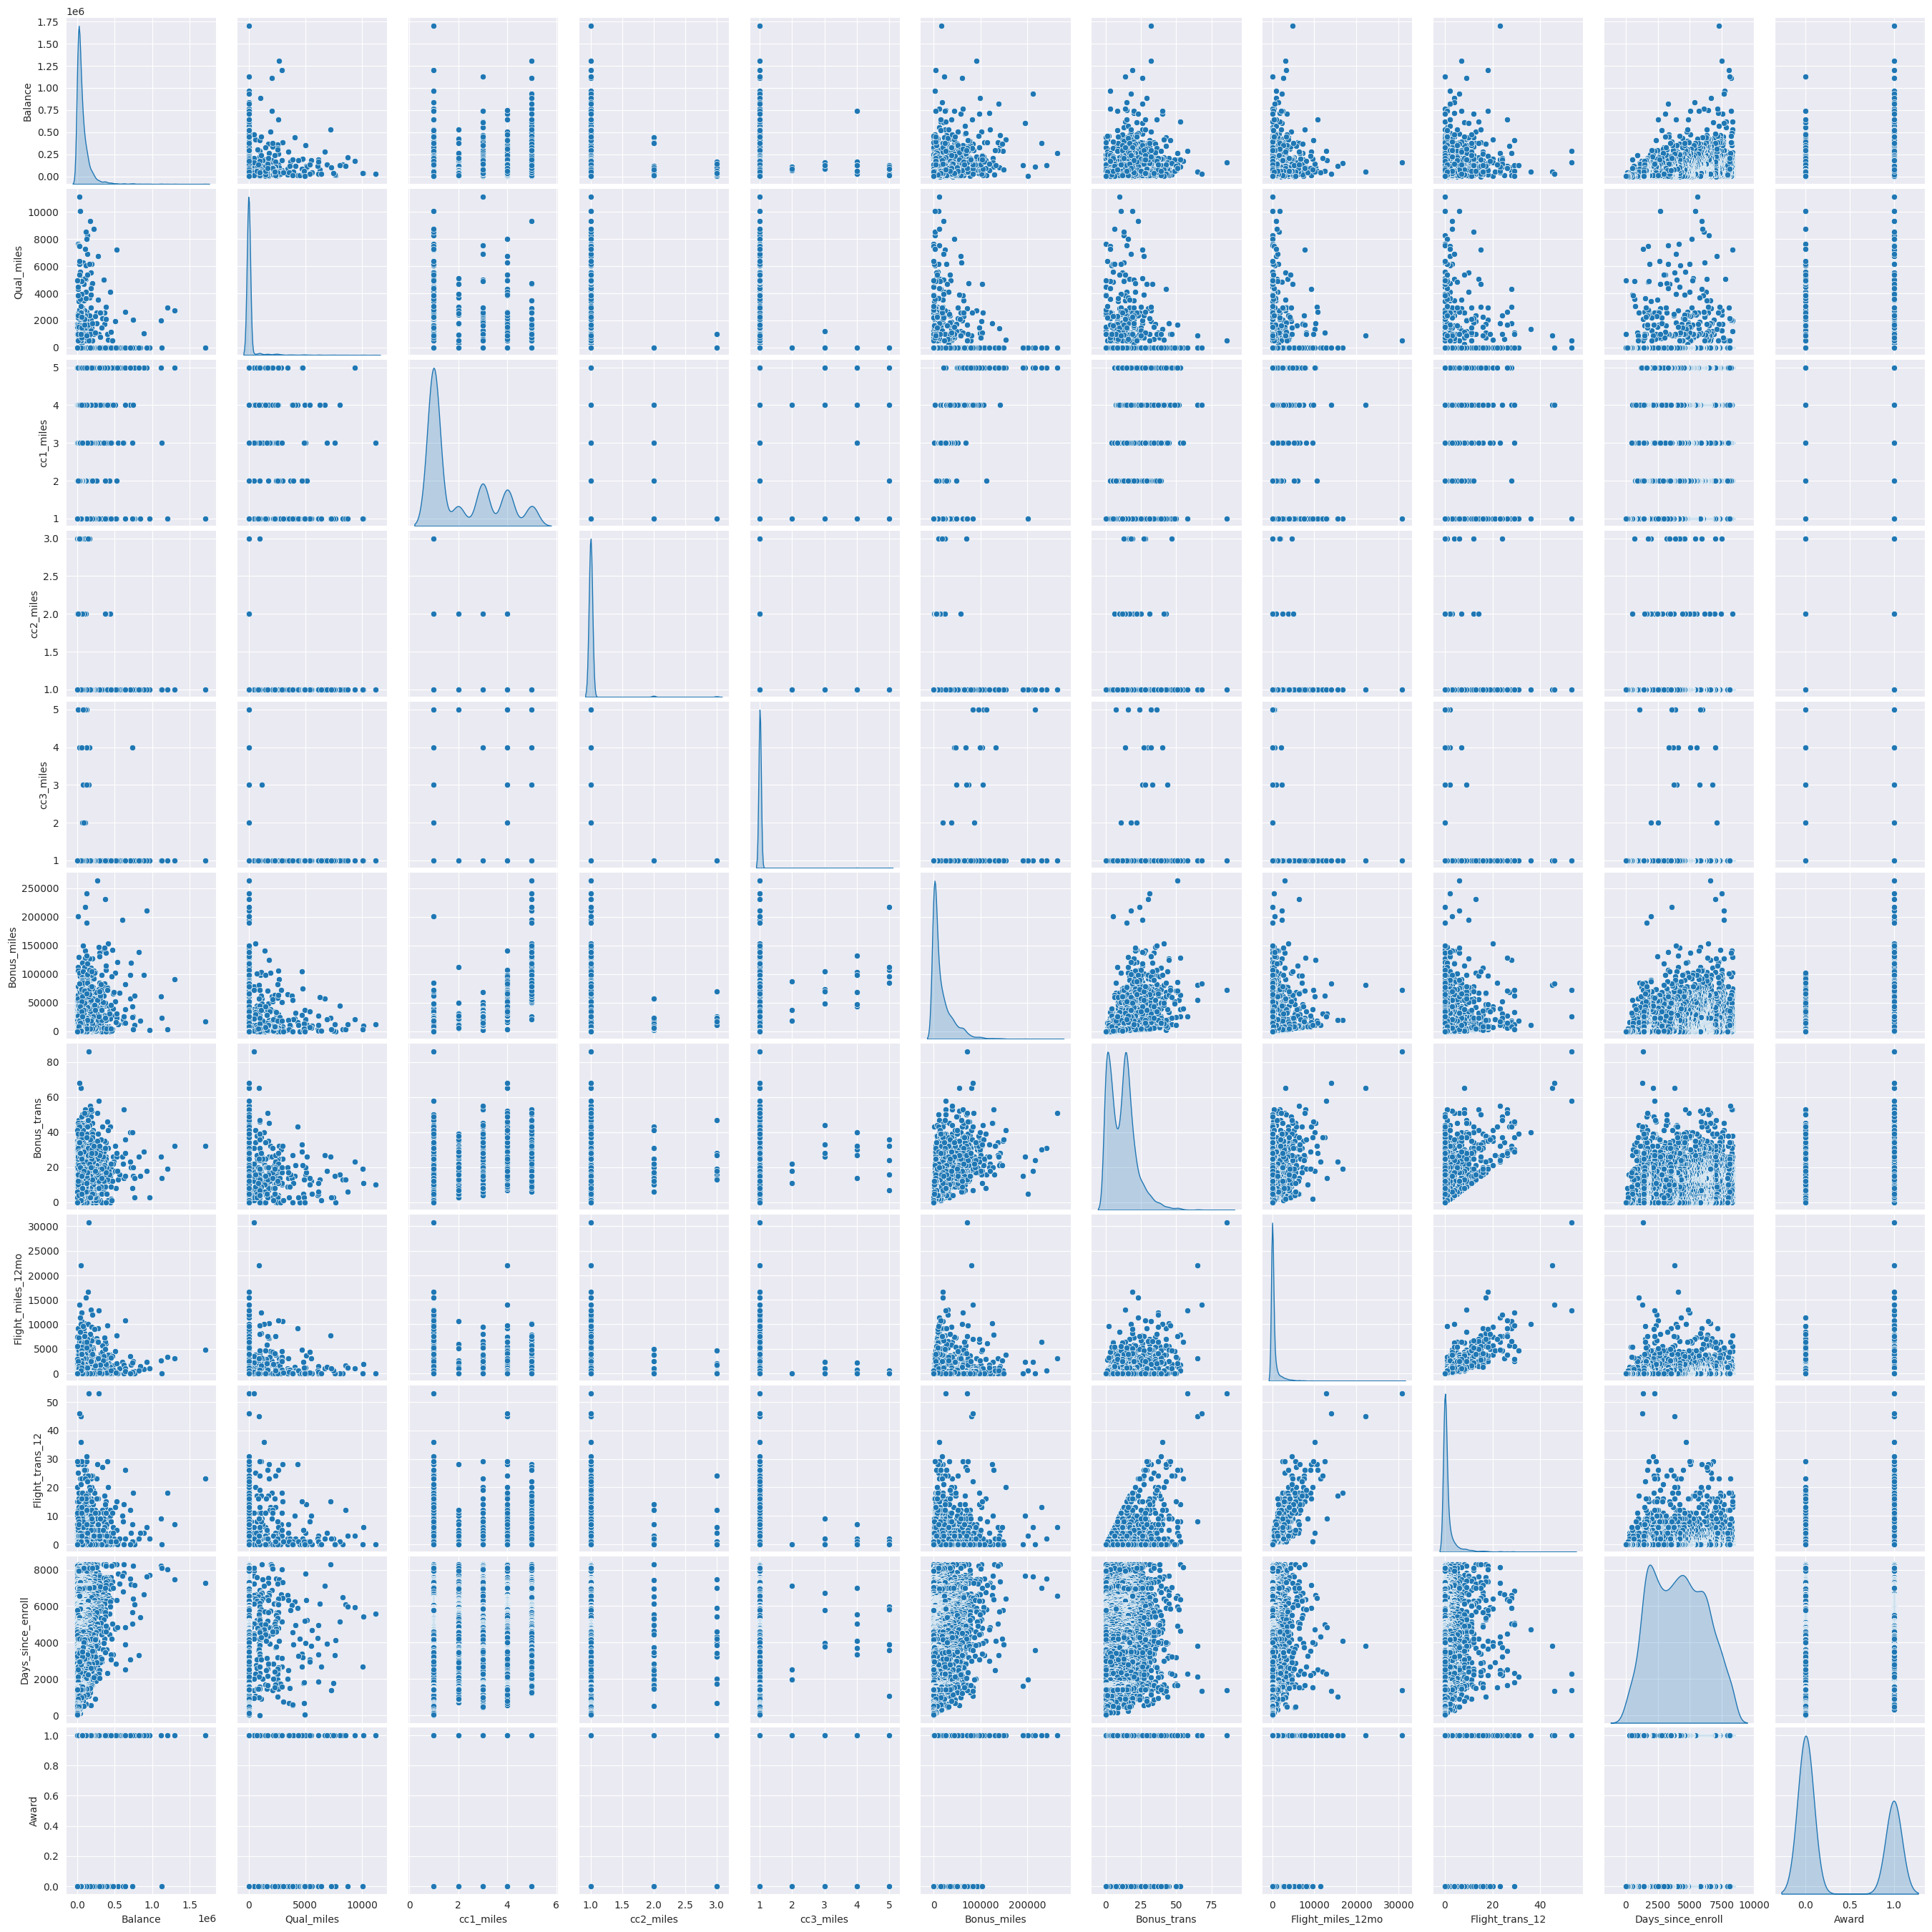

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(data2, diag_kind="kde")

Text(0.5, 1.0, 'Whether the client has a Award or not ')

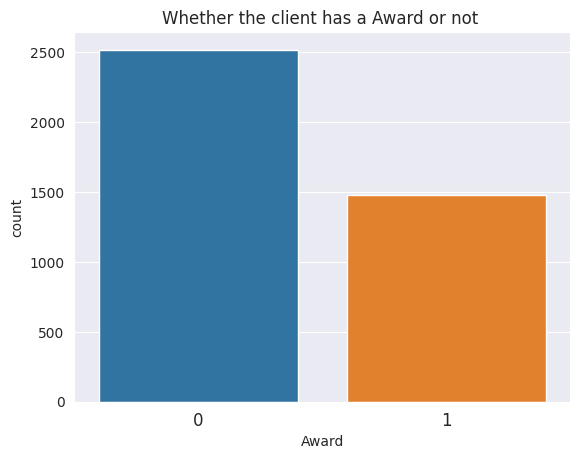

In [17]:
sns.countplot(x='Award', data=data2,
              order=data2['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

# **Hierarchical Clustering**

Agglomerative Clustering

In [ ]:
#normalization function
def norm_func(i) : #defining function
  x = (i-i.min())/i.max()-i.min() #x is normalized value
  return x

In [ ]:
#we are applying above function to our dataset.
df_norm = norm_func(data1)
df_norm #normalised values

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,-1.0,-1.0,-1.0,0.000660,0.011628,0.000000,0.000000,-1.156461,0.0
1,0.011288,0.0,-1.0,-1.0,-1.0,0.000815,0.023256,0.000000,0.000000,-1.160318,0.0
2,0.024257,0.0,-1.0,-1.0,-1.0,0.015636,0.046512,0.000000,0.000000,-1.152363,0.0
3,0.008667,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.000000,0.000000,-1.162247,0.0
4,0.057338,0.0,-0.4,-1.0,-1.0,0.164211,0.302326,0.067398,0.075472,-1.164296,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,-1.0,-1.0,-1.0,0.032330,0.046512,0.006490,0.018868,-1.831123,1.0
3995,0.037766,0.0,-1.0,-1.0,-1.0,0.003720,0.058140,0.000000,0.000000,-1.832088,1.0
3996,0.043169,0.0,-0.6,-1.0,-1.0,0.096505,0.093023,0.000000,0.000000,-1.831244,1.0
3997,0.032202,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.016225,0.018868,-1.831365,0.0


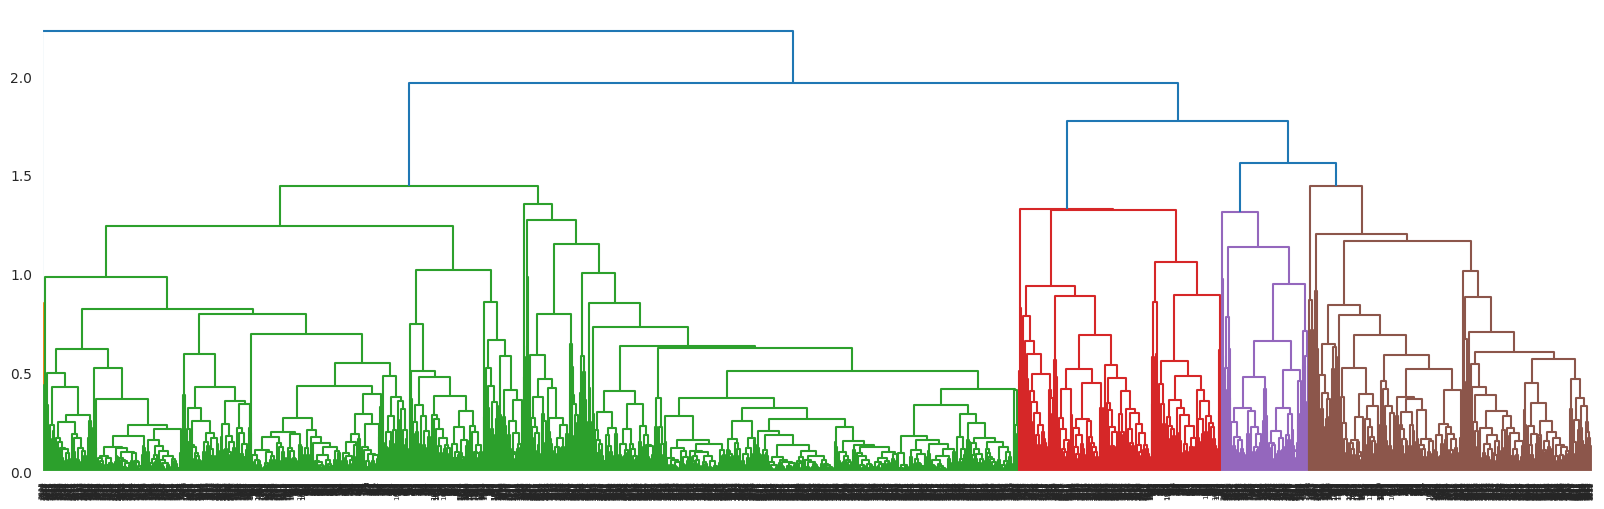

In [ ]:
#create dendrogram
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete')) #complete linkage

# **Fitting a model**

In [ ]:
#creating clusters
HC = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
#no. of clusters = 5, euclidean distance

In [ ]:
HC.fit(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [ ]:
y_hc = HC.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
data['h_clusterid'] = y_hc

In [ ]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [ ]:
data.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2173.169182,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0.383638
1,1,1819.850860,118880.873805,95.669216,4.204589,1.000000,1.047801,55371.229446,20.868069,664.862333,2.057361,4516.063098,1.0,1.944551
2,2,1723.817808,78576.331507,346.383562,1.420548,1.030137,1.002740,10186.349315,10.560274,665.830137,2.180822,4655.000000,1.0,0.593151
3,3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,1.000000
4,4,1618.491071,105679.250000,229.678571,3.107143,1.004464,1.000000,27460.687500,19.973214,1590.803571,4.397321,4825.290179,1.0,1.580357


In [ ]:
data['h_clusterid'].value_counts()

0    2518
2     730
1     523
4     224
3       4
Name: h_clusterid, dtype: int64

In [ ]:
Data1 = data.sort_values('h_clusterid')
Data1.iloc[:, [0, -1]]

,ID,h_clusterid
0,1,0
2494,2513,0
2495,2514,0
2496,2515,0
2497,2516,0
...,...,...
1327,1340,4
1326,1339,4
2101,2118,4
2078,2095,4


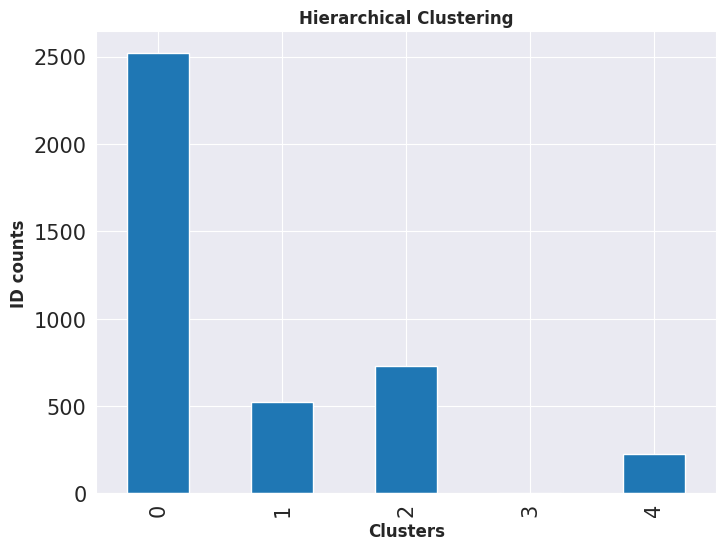

In [ ]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(8, 6))
data.groupby(['h_clusterid']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# **K-Means CLustering**

In [ ]:
scaler = StandardScaler() #storing in variable
scaled_df = scaler.fit_transform(data.iloc[:, 1:]) #fitting and transforming the data
scaled_df #scaled data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

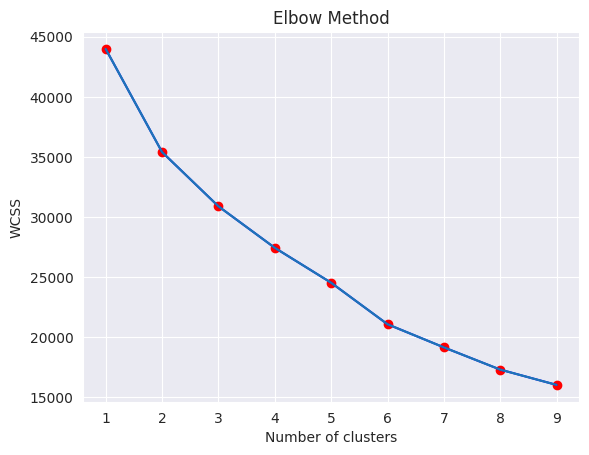

In [ ]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color = 'blue')
plt.scatter(range(1,10),wcss,color='red')
#plt.plot(x axis, y axis)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#choice of 4 clusters seems to be fair

In [ ]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [ ]:
data['clusterid_new'] = clusters_new.labels_
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
clusters_new.cluster_centers_ #checking centroids of clusters

array([[-2.98478754e-01, -6.42142013e-02, -6.13747535e-01,
         3.28947498e-02, -6.07426678e-02, -5.17995326e-01,
        -4.91207604e-01, -1.86400083e-01, -1.98822948e-01,
        -2.07899699e-01, -3.48824498e-01],
       [ 1.19130578e+00,  1.02056447e+00,  9.95222056e-02,
         1.36680959e-01, -6.27665798e-02,  6.19234895e-01,
         1.55056071e+00,  3.42272158e+00,  3.67662420e+00,
         2.79402662e-01,  9.08902922e-01],
       [ 4.21685967e-01, -9.97266943e-03,  1.18816125e+00,
        -8.23662416e-02, -5.47626400e-02,  9.03299347e-01,
         7.41625184e-01, -9.44153225e-02, -1.04476981e-01,
         3.70515148e-01,  5.62946631e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [ ]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2245.555073,43563.850375,94.365969,1.215949,1.019345,1.000395,4646.641532,6.893012,198.932096,0.619029,3688.991709,0.201737
1,1,1731.196532,193640.947977,933.589595,2.196532,1.034682,1.000000,32098.098266,26.491329,5251.982659,15.317919,4695.491329,0.809249
2,2,1600.001565,116129.633020,136.613459,3.696401,1.002347,1.001565,38990.929577,18.726135,328.384194,0.978873,4886.052426,0.643192
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [ ]:
data[data['clusterid_new']==3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,3
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,3
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,3
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,3
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,3
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,3
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,3
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,3
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,3
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,3


In [ ]:
data[data['clusterid_new']==2] #1278 datapoints in cluster 2

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,2
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,2
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,2


In [ ]:
data[data['clusterid_new']==1] #173 datapoints in cluster 1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,1
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,1
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,1
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,1
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,1
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,1


In [ ]:
data[data['clusterid_new']==0] #2533 datapoints in cluster 0

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
data['clusterid_new'].value_counts()

0    2533
2    1278
1     173
3      15
Name: clusterid_new, dtype: int64

# **DBSCAN**

In [19]:
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [18]:
#DBSCAN expects data in the form of an array/numpy representation
array = data1.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [20]:
#doing standardization
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

In [21]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [26]:
#-1 is outliers and there are 2 clusters
#Min >= D+1 where D is the number of columns.
#as we decrease eps, more outliers are formed as radius decreases.
model = DBSCAN(eps = 1, min_samples = 12)
model.fit_predict(X)

array([0, 0, 0, ..., 1, 0, 0])

In [27]:
#noisy sample giving the label -1
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [28]:
y=pd.DataFrame(model.fit_predict(X),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

 0    2266
 1    1022
-1     711
Name: clusterid_DBSCAN, dtype: int64

In [29]:
cl = pd.DataFrame(model.labels_, columns = ['clusterid_DBSCAN'])
cl

,clusterid_DBSCAN
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [30]:
clustered = pd.concat([data,cl], axis = 1)
clustered.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [32]:
#checking outliers
clustered[clustered['clusterid_DBSCAN']== -1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_DBSCAN
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
24,25,205651,500,1,1,1,4025,21,700,4,7932,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,3973,59650,0,1,1,1,5050,16,3950,13,1476,0,-1
3959,3982,13942,0,1,2,1,5822,12,0,0,1458,0,-1
3961,3984,131125,862,1,1,1,4993,11,50,1,1443,0,-1
3967,3990,26504,0,2,1,1,10599,29,1000,7,1445,0,-1


In [33]:
clustered.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1795.715893,166416.691983,793.471167,2.593530,1.081575,1.068917,35869.780591,20.652602,1963.396624,5.672293,4563.983122,0.64557
1,0,2180.668138,51896.169903,2.263901,1.650927,1.000000,1.000000,8883.076787,8.273169,99.702560,0.334951,3801.345543,0.00000
2,1,1799.525440,57155.303327,6.874755,2.593933,1.000000,1.000000,22436.178082,12.685910,213.172211,0.685910,4512.013699,1.00000


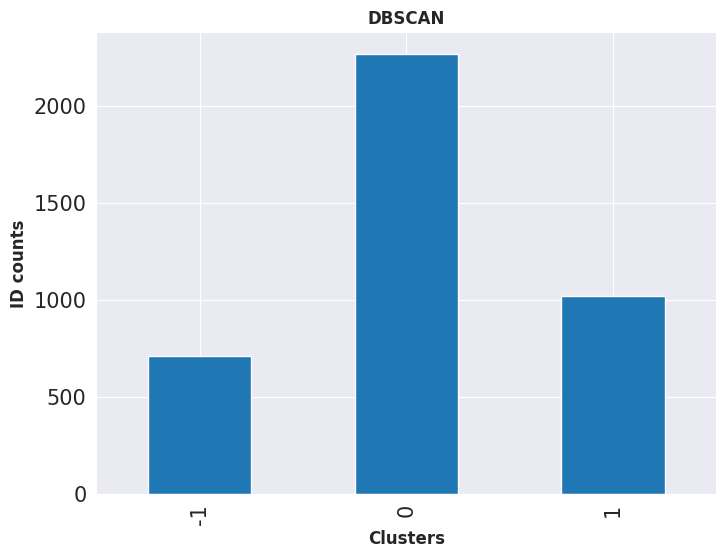

In [36]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(8, 6))
clustered.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.title('DBSCAN',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
